In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
import math

In [181]:
df1 = pd.read_csv("dataset1.csv")
df2 = pd.read_csv("dataset2.csv")

In [182]:
df1.head()

,start_time,bat_landing_to_food,habit,rat_period_start,rat_period_end,seconds_after_rat_arrival,risk,reward,month,sunset_time,hours_after_sunset,season
0,30/12/2017 18:37,16.000000,rat,30/12/2017 18:35,30/12/2017 18:38,108,1,0,0,30/12/2017 16:45,1.870833,0
1,30/12/2017 19:51,0.074016,fast,30/12/2017 19:50,30/12/2017 19:55,17,0,1,0,30/12/2017 16:45,3.100833,0
2,30/12/2017 19:51,4.000000,fast,30/12/2017 19:50,30/12/2017 19:55,41,0,1,0,30/12/2017 16:45,3.107500,0
3,30/12/2017 19:52,10.000000,rat,30/12/2017 19:50,30/12/2017 19:55,111,1,0,0,30/12/2017 16:45,3.126944,0
4,30/12/2017 19:54,15.000000,rat,30/12/2017 19:50,30/12/2017 19:55,194,1,0,0,30/12/2017 16:45,3.150000,0


In [183]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   start_time                 907 non-null    object 
 1   bat_landing_to_food        907 non-null    float64
 2   habit                      866 non-null    object 
 3   rat_period_start           907 non-null    object 
 4   rat_period_end             907 non-null    object 
 5   seconds_after_rat_arrival  907 non-null    int64  
 6   risk                       907 non-null    int64  
 7   reward                     907 non-null    int64  
 8   month                      907 non-null    int64  
 9   sunset_time                907 non-null    object 
 10  hours_after_sunset         907 non-null    float64
 11  season                     907 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 85.2+ KB


**habit showing null values**

In [184]:
df1['habit'].value_counts()

habit
fast                                                245
rat                                                 221
pick                                                139
bat                                                  30
bat_fight                                            26
                                                   ... 
bat_fight_and_rat                                     1
rat_and_rat                                           1
not_sure_rat                                          1
501.0,358.4,636.2,423.4; 476.0,103.0,634.0,206.0      1
rat_and_bat_and_pick                                  1
Name: count, Length: 81, dtype: int64

**Habit column showing some Garbage Value**

In [185]:
df1.describe()

,bat_landing_to_food,seconds_after_rat_arrival,risk,reward,month,hours_after_sunset,season
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,11.713134,282.877619,0.495039,0.533627,3.800441,5.531863,0.833517
std,27.644410,240.974918,0.500251,0.499143,1.199190,2.414146,0.372719
min,0.010238,0.000000,0.000000,0.000000,0.000000,-0.261667,0.000000
25%,1.000000,89.500000,0.000000,0.000000,4.000000,3.779028,1.000000
50%,4.000000,206.000000,0.000000,1.000000,4.000000,5.622778,1.000000
75%,11.500000,446.500000,1.000000,1.000000,5.000000,7.402778,1.000000
max,443.000000,949.000000,1.000000,1.000000,5.000000,12.091944,1.000000


**hours_after_sunset showing negetive value**

In [186]:
df1["hours_after_sunset"] = df1['hours_after_sunset'].apply(lambda x: x if x>0 else (-1*x))

**bat_landing_to_food showing extream decimal values in zero**

In [187]:
df1["bat_landing_to_food"] = df1['bat_landing_to_food'].apply(lambda x: x if x>=1 else 0)

In [188]:
df1.describe()

,bat_landing_to_food,seconds_after_rat_arrival,risk,reward,month,hours_after_sunset,season
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,11.705623,282.877619,0.495039,0.533627,3.800441,5.535934,0.833517
std,27.647585,240.974918,0.500251,0.499143,1.199190,2.404785,0.372719
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.015278,0.000000
25%,1.000000,89.500000,0.000000,0.000000,4.000000,3.779028,1.000000
50%,4.000000,206.000000,0.000000,1.000000,4.000000,5.622778,1.000000
75%,11.500000,446.500000,1.000000,1.000000,5.000000,7.402778,1.000000
max,443.000000,949.000000,1.000000,1.000000,5.000000,12.091944,1.000000


In [190]:
df1['bat_landing_to_food'].value_counts()

bat_landing_to_food
1.0      140
0.0      123
2.0      104
3.0       64
4.0       62
        ... 
195.0      1
38.0       1
76.0       1
45.0       1
120.0      1
Name: count, Length: 82, dtype: int64

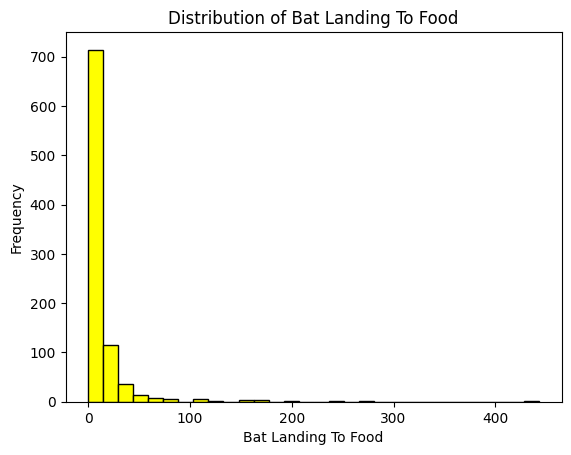

In [191]:
plt.hist(df1["bat_landing_to_food"], bins=30, color='yellow', edgecolor='black')
plt.xlabel("Bat Landing To Food")
plt.ylabel("Frequency")
plt.title("Distribution of Bat Landing To Food")
plt.show()

In [192]:
sample = df1['bat_landing_to_food'].values
x_bar = stats.mean(sample)
print("Mean:", x_bar)

median = stats.median(sample)
print("Median: %.2f" % median)

mode = stats.mode(sample)
print("Mode value: %.2f" % mode)

the_range = np.max(sample) - np.min(sample)
print("Range: %.2f" % the_range)

sample_array = np.array(sample)
s_square = sample_array.var(ddof=1)
sigma_square = sample_array.var()
print("Sample variance: %.2f. Population variance: %.2f." % (s_square, sigma_square))

s = sample_array.std(ddof=1)
sigma = sample_array.std()
print("Sample std. dev.: %.2f. Population std. dev.: %.2f." % (s, sigma))

pct25 = np.percentile(sample, 25)
pct75 = np.percentile(sample, 75)
iqr = pct75 - pct25
print("IQR: %.2f. 25th percentile: %.2f. 75th percentile: %.2f" % (iqr, pct25, pct75))


Mean: 11.705622932745314
Median: 4.00
Mode value: 1.00
Range: 443.00
Sample variance: 764.39. Population variance: 763.55.
Sample std. dev.: 27.65. Population std. dev.: 27.63.
IQR: 10.50. 25th percentile: 1.00. 75th percentile: 11.50


In [193]:
df1['seconds_after_rat_arrival'].value_counts()

seconds_after_rat_arrival
105    7
22     7
187    6
139    6
0      6
      ..
448    1
293    1
317    1
51     1
774    1
Name: count, Length: 501, dtype: int64

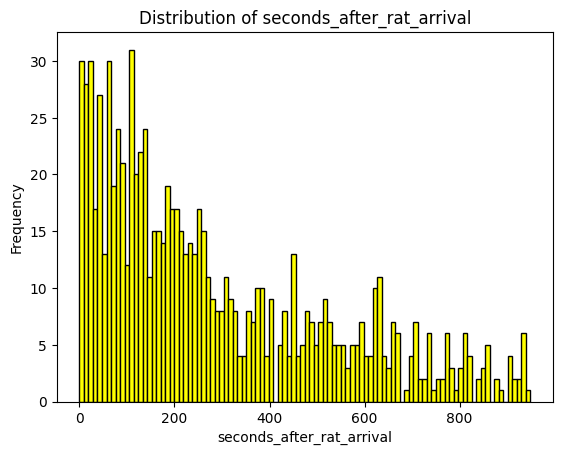

In [194]:
plt.hist(df1["seconds_after_rat_arrival"], bins=100, color='yellow', edgecolor='black')
plt.xlabel("seconds_after_rat_arrival")
plt.ylabel("Frequency")
plt.title("Distribution of seconds_after_rat_arrival")
plt.show()


In [195]:
sample = df1['seconds_after_rat_arrival'].values
x_bar = stats.mean(sample)
print("Mean:", x_bar)

median = stats.median(sample)
print("Median: %.2f" % median)

mode = stats.mode(sample)
print("Mode value: %d" % mode)

the_range = np.max(sample) - np.min(sample)
print("Range: %d" % the_range)

sample_array = np.array(sample)
s_square = sample_array.var(ddof=1)
sigma_square = sample_array.var()
print("Sample variance: %.2f. Population variance: %.2f." % (s_square, sigma_square))

s = sample_array.std(ddof=1)
sigma = sample_array.std()
print("Sample std. dev.: %.2f. Population std. dev.: %.2f." % (s, sigma))

pct25 = np.percentile(sample, 25)
pct75 = np.percentile(sample, 75)
iqr = pct75 - pct25
print("IQR: %.2f. 25th percentile: %.2f. 75th percentile: %.2f" % (iqr, pct25, pct75))


Mean: 282
Median: 206.00
Mode value: 22
Range: 949
Sample variance: 58068.91. Population variance: 58004.89.
Sample std. dev.: 240.97. Population std. dev.: 240.84.
IQR: 357.00. 25th percentile: 89.50. 75th percentile: 446.50


In [196]:
df1['risk'].value_counts()

risk
0    458
1    449
Name: count, dtype: int64

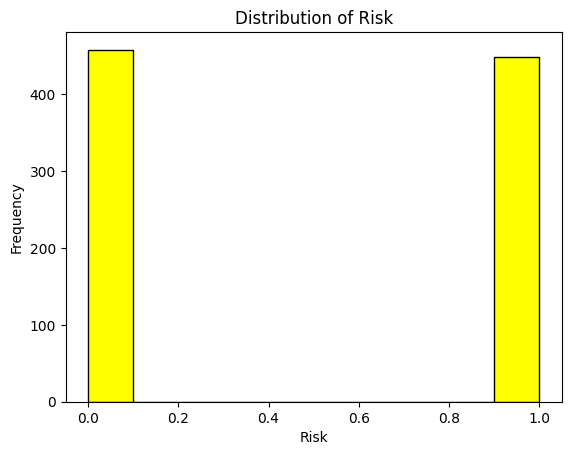

In [197]:
plt.hist(df1["risk"], color='yellow', edgecolor='black')
plt.xlabel("Risk")
plt.ylabel("Frequency")
plt.title("Distribution of Risk")
plt.show()

**bat avoding is slightly higher than taking risk**

In [198]:
df1['reward'].value_counts()

reward
1    484
0    423
Name: count, dtype: int64

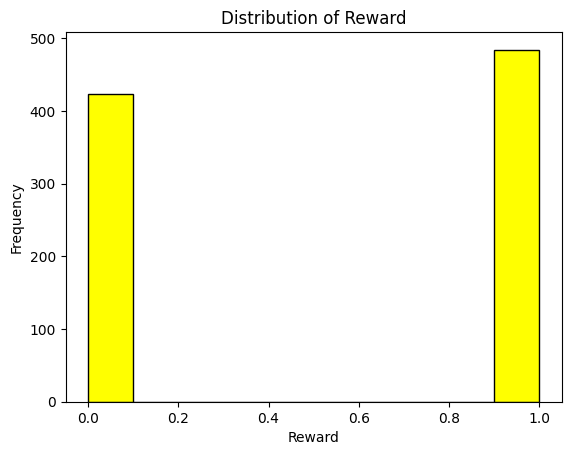

In [199]:
plt.hist(df1["reward"], color='yellow', edgecolor='black')
plt.xlabel("Reward")
plt.ylabel("Frequency")
plt.title("Distribution of Reward")
plt.show()

In [200]:
df1['hours_after_sunset'].value_counts()

hours_after_sunset
6.658056    2
7.415278    2
3.166111    2
4.894722    2
8.554722    2
           ..
6.936667    1
6.966111    1
6.986111    1
6.999444    1
5.187500    1
Name: count, Length: 895, dtype: int64

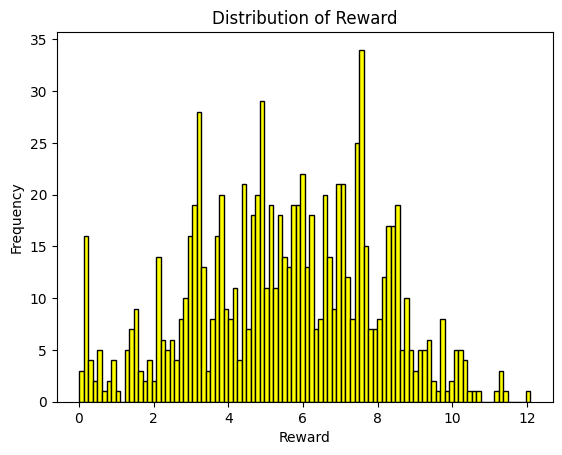

In [201]:
plt.hist(df1["hours_after_sunset"],bins=100, color='yellow', edgecolor='black')
plt.xlabel("Reward")
plt.ylabel("Frequency")
plt.title("Distribution of Reward")
plt.show()

##  Key columns in dataset1

For investigating whether bats perceive rats as predators, we focus on:
- **Risk Column**: 
- **bat_landing_to_food**: 
- **Rewards**: 
- **Habit**:

In [202]:
risk_taking_times = df1[df1['risk'] == 1]['bat_landing_to_food']
risk_avoidance_times = df1[df1['risk'] == 0]['bat_landing_to_food']


print(f"Risk-taking approach times:")
print(f"  Count: {len(risk_taking_times)}")
print(f"  Mean: {stats.mean(risk_avoidance_times):.2f} seconds")
print(f"  Median: {np.median(risk_avoidance_times):.2f} seconds")
print(f"  Std Dev: {np.std(risk_avoidance_times, ddof=1):.2f} seconds")

print(f"\nRisk-avoidance approach times:")
print(f"  Count: {len(risk_avoidance_times)}")
print(f"  Mean: {stats.mean(risk_avoidance_times):.2f} seconds")
print(f"  Median: {np.median(risk_avoidance_times):.2f} seconds")
print(f"  Std Dev: {np.std(risk_avoidance_times, ddof=1):.2f} seconds")

Risk-taking approach times:
  Count: 449
  Mean: 7.12 seconds
  Median: 2.00 seconds
  Std Dev: 20.53 seconds

Risk-avoidance approach times:
  Count: 458
  Mean: 7.12 seconds
  Median: 2.00 seconds
  Std Dev: 20.53 seconds


In [203]:
total_attempts = len(df1)
successful_attempts = len(df1[df1['reward'] == 1])
overall_success_rate = successful_attempts / total_attempts

print(f"Overall foraging attempts: {total_attempts}")
print(f"Successful attempts: {successful_attempts}")
print(f"Overall success rate: {overall_success_rate:.3f} ({overall_success_rate*100:.1f}%)")

# Success rates by risk behavior
risk_taking_success = df1[df1['risk'] == 1]['reward'].mean()
risk_avoidance_success = df1[df1['risk'] == 0]['reward'].mean()

print(f"\nSuccess rates by risk behavior:")
print(f"Risk-taking success rate: {risk_taking_success:.3f} ({risk_taking_success*100:.1f}%)")
print(f"Risk-avoidance success rate: {risk_avoidance_success:.3f} ({risk_avoidance_success*100:.1f}%)")


Overall foraging attempts: 907
Successful attempts: 484
Overall success rate: 0.534 (53.4%)

Success rates by risk behavior:
Risk-taking success rate: 0.218 (21.8%)
Risk-avoidance success rate: 0.843 (84.3%)


In [204]:
df1['habit'].mode()

0    fast
Name: habit, dtype: object

In [205]:
df1.dropna(subset=['habit'], inplace=True)

In [206]:
df1['habit'].isna().sum()

np.int64(0)

In [209]:
bins = [0, 200, 400, df1['seconds_after_rat_arrival'].max()]
labels = ["immediate", "short_delay", "long_delay"]
df1["bat_rat_after_rat_arrive_bin"] = pd.cut(df1["seconds_after_rat_arrival"], bins=bins, labels=labels)


In [211]:
df1['bat_rat_after_rat_arrive_bin'].value_counts()

bat_rat_after_rat_arrive_bin
immediate      417
long_delay     238
short_delay    205
Name: count, dtype: int64